In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from wordcloud import WordCloud

#### Part 1. Examine the data, delete anomalies in the data (if exist)

In [2]:
# Read the data from the file and create the object.
raw_data = pd.read_csv("AB_NYC_2019.csv")
# Remove the data that either its price or the number of days when the listing is available for booking is non-positive (anomalies).
data = raw_data[(raw_data["price"] > 0) & (raw_data["availability_365"] > 0)]

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In the data set, the "price" column and "avaliability_365" column will be tested. Since the price and the number of days when listing is available for booking will not zero, the airbnb's data that has these values are anomalies. Thus, they are removed in the process of cleaning the data. 

#### Part 2. Examine how the prices of the Airbnb changes with the change in the neighborhood

a. Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood

In [4]:
# Group the dataset by the column "neighbourhood", and then remove the group if its size is not greater than 5. 
# And then, choose median price in each group.
data_T2_a = data[["neighbourhood", "price"]].groupby("neighbourhood").filter(lambda g: len(g) > 5).groupby("neighbourhood").median()

In [5]:
# Sort the data by the column "price" in ascending order, and choose the first five.
data_T2_a.sort_values(by = "price", ascending = True).head()

,price
neighbourhood,
Concord,34.5
Castle Hill,39.0
Hunts Point,40.0
Corona,40.0
Tremont,41.0


In [6]:
# Sort the data by the column "price" in descending order, and choose the first five.
data_T2_a.sort_values(by = "price", ascending = False).head()

,price
neighbourhood,
Tribeca,309.0
Flatiron District,299.0
NoHo,250.0
Midtown,225.0
West Village,218.0


b. Analyze, the price variation between different neighborhood group, and plot these trends

In [7]:
# Only choose two columns, "neighbourhood_group" and "price", and group the dataset by the column "neighbourhood_group".
data_T2_b = data[["neighbourhood_group", "price"]].groupby("neighbourhood_group")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a46535100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a465357c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a4743ec70>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9a46535e80>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f9a4653f220>,
  <matplotlib.lines.Line2D at 0x7f9a4746b220>]}

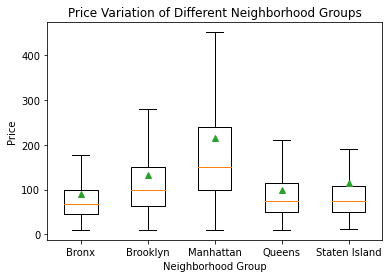

In [8]:
# Create Mutiple Boxplots by the dataset obtained previously.
labels = list(data_T2_b.groups.keys())
fig, ax = plt.pyplot.subplots()
ax.set_title("Price Variation of Different Neighborhood Groups")
ax.set_xlabel('Neighborhood Group')
ax.set_ylabel('Price')
ax.boxplot(data_T2_b["price"].apply(pd.Series.tolist), showfliers = False, labels = labels, showmeans = True)

In order to analyze the price variation between different neighborhood groups, the boxplot of all neighborhood groups has been created. However, there is a lot of luxury Airbnb which may affect our graph, and these outliers will not help analyze the price variation. Thus, the outliers have been removed in the multiple boxplots. From the plot, the range of price in Manhattan is the greatest, and Manhattan also has the most expensive Airbnb among all neighborhood groups. In addition, the median and mean of the price in Manhattan is also the highest. Therefore, we may conclude that the price and price variation will increase if the neighborhood group is in Manhattan.

#### Part 3. Do a pairwise Pearson correlation analysis on all pairs of numeric variables, and show the result with a heat map and find out most positive and negative correlations

In [9]:
# Pick the numeric columns from the original dataset, and these features can be used to calculate the correlation coefficients.
data_T3 = data.select_dtypes(include = np.number)[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

In [10]:
# Create a talbe of a pairwise Pearson correlation analysis on all pairs of these variables.
data_T3.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.039459,-0.072893,-0.063706,0.060810,0.074505
minimum_nights,0.039459,1.000000,-0.116035,-0.170428,0.124211,0.125397
number_of_reviews,-0.072893,-0.116035,1.000000,0.488247,-0.115423,0.009838
reviews_per_month,-0.063706,-0.170428,0.488247,1.000000,-0.054360,-0.064679
calculated_host_listings_count,0.060810,0.124211,-0.115423,-0.054360,1.000000,0.187954
availability_365,0.074505,0.125397,0.009838,-0.064679,0.187954,1.000000


<AxesSubplot:>

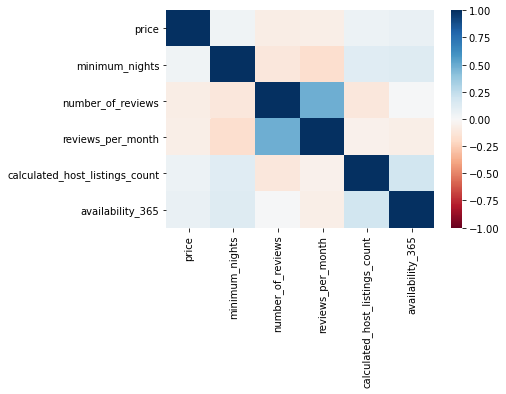

In [11]:
# Show the results as a heatmap.
sns.heatmap(data_T3.corr(), cmap = "RdBu", vmin = -1, vmax = 1)

In the above heatmap, the blue color represents positive correlations, and the red color represents negative correlations. Also, darker color implies the absolute value of the correlation coefficient is closer to 1. According to the heatmap, "number of reviews" and "reviews per month" have the most positive correlations, and "reviews per month" and "minimum nights" have the most negative correlations.

#### Part 4. The Latitude and Longitude of all the Airbnb listings are provided in the dataset

a. Plot a scatter plot based on the coordinates, and the points are colored based on the neighborhood group feature

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

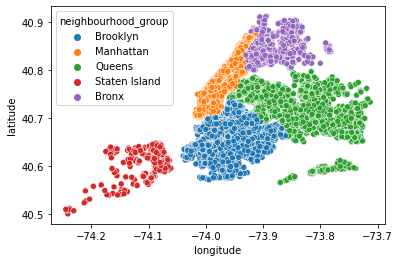

In [12]:
# Create a scatter plot where x value is the column "longitude", and the y value is the column "latitude".
# The color of the points bases the column "neighbourhood_group".
sns.scatterplot(x = data["longitude"], y = data["latitude"], hue = data["neighbourhood_group"])

b. Plot a scatter plot based on the coordinates, and the points are colored based on the price of the particular Airbnb

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

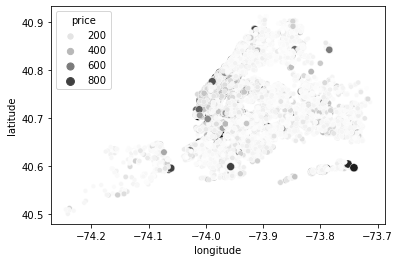

In [13]:
# Remove the data whose price is greater or euqal to 1000.
data_T4_b = data[data["price"] < 1000]
# Create a scatter plot where x value is the column "longitude", and the y value is the column "latitude".
# The color and size of the points bases the column "price".
sns.scatterplot(x = data_T4_b["longitude"], y = data_T4_b["latitude"], hue = data_T4_b["price"], size = data_T4_b["price"], palette = "Greys")

From the legend of the scatter plot, if the price of Airbnb is higher, the point is darker. According to the scatter plot, Manhattan is darker than the rest neighborhood groups. Therefore, we may conclude that Manhattan is the most expensive among all neighborhood groups.

#### Part 5. Find out which areas has the busiest (hosts with high number of listings) host, and figure out why these hosts are the busiest. 

In [14]:
# Create a DataFrame object, and pick the columns we need to use from the original dataset.
data_T6 = data[["neighbourhood_group", "neighbourhood", "price", "minimum_nights", "number_of_reviews", "availability_365"]] 

In [15]:
# Group the data by the column "neighbourhood", and count the number of listings in each group.
# Create a new column "count".
count_nbhd = data_T6.groupby(by = "neighbourhood").size().to_frame("count")
# Group the data by the column "neighbourhood", and apply mean() function to numeric values in each group.
# Add the new column "count".
data_nbhd = count_nbhd.merge(data_T6.groupby(by = "neighbourhood").mean(), on = "neighbourhood")

In [16]:
# Sort the data by the column "count", which the number of listings in each neighborhood in descending order, and show the top five.
data_nbhd.sort_values("count", ascending = False).head()

,count,price,minimum_nights,number_of_reviews,availability_365
neighbourhood,,,,,
Bedford-Stuyvesant,2478,115.354722,6.350686,39.598870,174.545198
Williamsburg,2051,161.171136,7.753291,35.203315,142.779132
Harlem,1734,129.643022,7.662053,38.734141,163.369666
Bushwick,1447,91.409122,6.852799,31.941949,162.447132
Hell's Kitchen,1446,213.183264,9.569848,31.527663,188.009682


According to the table, the neighborhood, Bedford-Stuyvesant, is the busiest area since it has the highest number of listings. In this neighborhood, the average price is 115.35, and the mean number of reviews is 40. In addition, the mean number of days when the listing is available for booking is 175, and the average amount of nights minimum is 7.

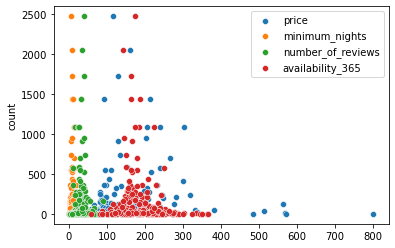

In [17]:
# Create the scatter plot between the column "count" and rest of columns.
sns.scatterplot(x = data_nbhd["price"], y = data_nbhd["count"]).set(xlabel=None)
sns.scatterplot(x = data_nbhd["minimum_nights"], y = data_nbhd["count"]).set(xlabel=None)
sns.scatterplot(x = data_nbhd["number_of_reviews"], y = data_nbhd["count"]).set(xlabel=None)
sns.scatterplot(x = data_nbhd["availability_365"], y = data_nbhd["count"]).set(xlabel=None)
plt.pyplot.legend(["price", "minimum_nights", "number_of_reviews", "availability_365"])

By the scatter plot, there is no linear relationship between the number of listings and price, minimum nights, number of reviews, and the number of days when the listing is available for booking. Thus, using the Spearman method instead of the Pearson method when we apply the function to find the correlation coefficient.

In [18]:
# Create a talbe of a pairwise Spearman correlation analysis on all pairs of these variables.
data_nbhd.corr(method = "spearman")

,count,price,minimum_nights,number_of_reviews,availability_365
count,1.000000,0.290313,0.462166,0.339947,-0.266635
price,0.290313,1.000000,0.350485,-0.051176,-0.173799
minimum_nights,0.462166,0.350485,1.000000,-0.068579,-0.231992
number_of_reviews,0.339947,-0.051176,-0.068579,1.000000,-0.107130
availability_365,-0.266635,-0.173799,-0.231992,-0.107130,1.000000


<AxesSubplot:>

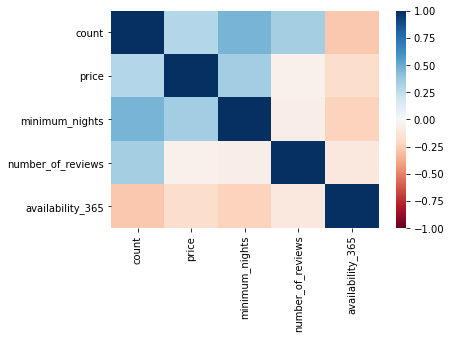

In [19]:
# Show the results as a heatmap.
sns.heatmap(data_nbhd.corr(method = "spearman"), cmap = "RdBu", vmax = 1, vmin = -1)

After applying the function .corr(), we obtain the table of correlation coefficients, and we also create a heat map by this table. We only need to focus on the result of the first row since we only want to figure out the relationship between the count and four variables. From the heat map, we find that the relationship between the number of listings and price, minimum nights, and the number of reviews is positive, but the relationship between the number of listings and the number of days when the listing is available for booking is negative.

By the properties of a spearman correlation coefficient, a positive coefficient corresponds to an increasing monotonic trend between the number of listings and variables, while a negative coefficient corresponds to a decreasing monotonic trend. If the price of an area is higher, more hosts want to make listings here. Also, more reviews imply a higher number of customers, and hosts are willing to make listings in a place that has a lot of customers. And the minimum number of nights can demonstrate the requirement to Airbnb in the area. Hence, if the number of minimum nights increases, hosts may think there is a chance to earn money in the area. Similarly, the number of days when a listing is available for booking also represents the requirement to Airbnb, on the contrary, the smaller it is the more people live in this area. This is the reason why the coefficient is negative between the number of listings and the number of days when the listing is available for booking.

From the data of the neighborhood, Bedford-Stuyvesant, all of the values of its variables are located in the middle place according to the scatter plot. Thus,  the values of its variables (price, minimum nights, the number of reviews, and the number of days available for booking) are similar to most areas. As mentioned before, the relationship is non-linear, so the higher values don't imply a higher number of listings. Since the values of its four variables are in the middle place, which means the number of listings in the area should not lower than most neighborhoods. The other factors such as traffic, views may also lead to a higher number of listings, these may be the reasons why this place has the highest number of listings.

#### Task 6. Find the distribution of listings' prices

In [20]:
# Create a DataFrame object, and pick the columns we need to use from the original dataset.
data_T7 = data[["host_id", "neighbourhood_group", "price", "number_of_reviews", "calculated_host_listings_count"]]

Text(0, 0.5, 'the number of listings')

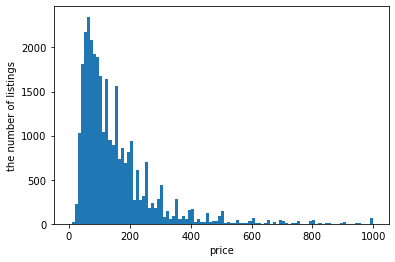

In [21]:
# Create a DataFrame object, and only pick the column "price".
data_price = data_T7["price"]
# Create a histogram based on the column "price".
plt.pyplot.hist(data_price, range = [0, 1000], bins = 100)
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("the number of listings")

Histogram created by the price of all listings, and we can find the distribution of all listings' prices by the plot. According to the histogram, we can see that the prices of most listings are between 0 and 200 dollars, and a very small proportion of all listings in the dataset will have their prices of more than 200 dollars.

#### Part 7. How do hosts set their listings price? What's the number of reviews of his/her every listing? How do these two variables affect the number of listings that the host have?

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

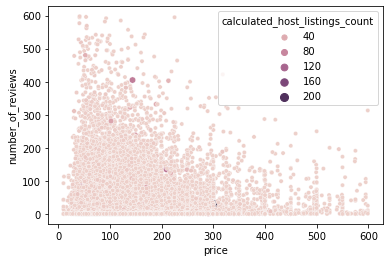

In [22]:
# Group the data by the column "host_id", and apply mean() function to numeric values in each group.
data_host = data_T7[["host_id", "price", "calculated_host_listings_count"]].groupby("host_id").mean().merge(data_T7[["host_id", "neighbourhood_group", "number_of_reviews"]].groupby("host_id").sum(), on = "host_id")
# Remove the data that has large values.
data_host = data_host[(data_host["price"] < 600) & (data_host["number_of_reviews"] < 600)][["price", "number_of_reviews", "calculated_host_listings_count"]]
# Create a scatter plot, using price and the number of reviews to determine the position, and using the amount of listing per host to determine the color and size.
sns.scatterplot(x = data_host["price"], y = data_host["number_of_reviews"], hue = data_host["calculated_host_listings_count"], size = data_host["calculated_host_listings_count"])

As mentioned previously, more reviews imply a higher number of customers. Thus, a scatter plot is created by the host's average listing price, and its average reviews per listing. In addition, the size and the color are based on the number of listings that the host has.

However, according to the scatter plot, only a few hosts own more than 80 listings, but we can find that all of them have higher prices or reviews (higher customers).

In addition, by the plot, we can find that most hosts set their price between 0 and 200. And the number of average reviews for his/her every listing is between 0 and 300.

#### Part 8. Which neighborhood group has the highest number of reviews? What's proportion in each neiborhood group to the number of total reviews?

Text(0, 0.5, 'the number of reviews')

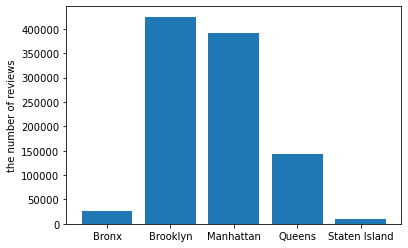

In [23]:
# Group the data by the column "host_id", and apply sum() function to numeric values in each group.
data_nbhd_group = data_T7[["neighbourhood_group", "number_of_reviews"]].groupby("neighbourhood_group").sum()
# Create a bar plot base on the number of reviews in each neighborhood group.
plt.pyplot.bar(data_T7.groupby("neighbourhood_group").groups.keys(), data_nbhd_group["number_of_reviews"])
plt.pyplot.ylabel("the number of reviews")

(-1.117405008511045,
 1.1008288099290975,
 -1.109751047776068,
 1.2183611725876224)

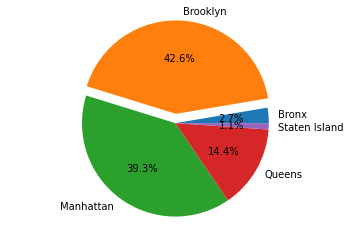

<Figure size 3600x3600 with 0 Axes>

In [24]:
# Create a pie chart base on the number of reviews in each neighborhood group.
fig1, ax1 = plt.pyplot.subplots()
plt.pyplot.figure(figsize = (50, 50))
ax1.pie(data_nbhd_group["number_of_reviews"], explode = (0, 0.1, 0, 0, 0), labels = data_T7.groupby("neighbourhood_group").groups.keys(), autopct='%1.1f%%')
ax1.axis('equal') 

After calculating the number of reviews for each neighborhood group, we can see that Brooklyn has the highest number of reviews, and reviews in Manhattan is close to that in Brooklyn.

And then, the pie chart is created, and it shows the percent of reviews in each neighborhood group. The pie chart, also demonstrate that Brooklyn has the largest proportion of reviews, and we can also see the percent of reviews for each neighborhood from the chart.

In addition, we can see that Brooklyn and Manhattan have taken eighty percent of reviews. As mentioned previously, more reviews in the area imply more customers living here. Manhattan is the biggest financial center in the world, so there is a high requirement for Airbnb in Manhattan. However, Brooklyn is the nearest neighborhood group to Manhattan, and it's very convenient to take the subway to Manhattan. In addition, the price of listings in Brooklyn is relatively lower than in Manhattan. Therefore, the requirements to Airbnb in Brooklyn is also higher than rest three neighborhood.

#### Part 9. Fit a linear regression on the price

In [6]:
# Use package 'sklearn' to build a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

In [7]:
# Pick variables that used to fit the linear regression model
data_P9 = data[["price", "neighbourhood_group", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

# Set NaN to 0
data_P9 = data_P9.replace(np.nan, 0)

# Represent categorical variables as a number
# 'neighbourhood_group'
data_P9.insert(2, "Brooklyn", np.where(data_P9["neighbourhood_group"] == "Brooklyn", 1, 0))
data_P9.insert(3, "Manhattan", np.where(data_P9["neighbourhood_group"] == "Manhattan", 1, 0))
data_P9.insert(4, "Queens", np.where(data_P9["neighbourhood_group"] == "Queens", 1, 0))
data_P9.insert(5, "Bronx", np.where(data_P9["neighbourhood_group"] == "Bronx", 1, 0))
data_P9 = data_P9.drop("neighbourhood_group", axis=1)
# 'room_type'
room_type = []
for i in data_P9["room_type"]:
    if i == "Shared room":
        room_type.append(0)
    elif i == "Private room":
        room_type.append(1)
    else:
        room_type.append(2)
data_P9.iloc[:,5] = room_type

In [8]:
# Using Cross Validation to fit the model
coef = []
MSE = []
for i in range(100):
    # Seperate dataset
    train, test = train_test_split(data_P9)

    # Fit model without Cross Validation
    LR = LinearRegression()
    y = train.iloc[:,0]
    X = train.iloc[:,1:train.shape[1]]
    LR.fit(X, y)
    coef.append([LR.intercept_] + LR.coef_.tolist())
    
    # Calculate MSE and RMSE
    y_test = test.iloc[:,0]
    X_test = test.iloc[:,1:test.shape[1]]
    y_pred = LR.predict(X_test)
    MSE.append(np.mean(np.square(y_test - y_pred)))

coef_ = np.asarray(coef).mean(axis = 0)
MSE = np.mean(MSE)
RMSE = np.sqrt(MSE)

var_name = ["Intercept"] + list(data_P9.columns)
for i in range(len(coef_)):
    print(var_name[i] + " " + str(coef_[i]))
print()
print("MSE:", MSE)
print("RMSE:", RMSE)

Intercept -63.85247471816921
price 24.619984991909448
Brooklyn 90.49358626818913
Manhattan 4.530260382511595
Queens -7.27538476641699
Bronx 109.00340277075061
room_type -0.14981267698551737
minimum_nights -0.26748804284929817
number_of_reviews -4.501086327724397
reviews_per_month -0.14577289803293245
calculated_host_listings_count 0.17937555134301153

MSE: 55546.65739942992
RMSE: 235.68338380002507


#### Part 10. Build a random forest regression model

In [9]:
# Use package 'sklearn' to build a random forest regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
# Pick variables that used to fit the linear regression model
data_P10 = data[["latitude", "longitude", "room_type", "reviews_per_month", "calculated_host_listings_count", "availability_365", "price"]]

# Set NaN to 0
data_P10 = data_P10.replace(np.nan, 0)

# Convert 'room_type'
room_type = []
for i in data_P9["room_type"]:
    if i == "Shared room":
        room_type.append(0)
    elif i == "Private room":
        room_type.append(1)
    else:
        room_type.append(2)
data_P10.iloc[:,2] = room_type

# Convert 'price'
price_level = []
for i in data_P10["price"]:
    if i <= 100:
        price_level.append(0)
    elif i <= 200:
        price_level.append(1)
    else:
        price_level.append(2)
data_P10.iloc[:,6] = price_level

In [16]:
# Fit model with Cross Validation
y = data_P10["price"]
X = data_P10[["latitude", "longitude", "room_type", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Find optimal depth for random forest regression model
depth = 0
accuracy_score = 0
for i in range(2, 10):
    CLF = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    CLF = CLF.fit(X_train, y_train)
    y_pred = CLF.predict(X_test)
    if metrics.accuracy_score(y_test, y_pred) - accuracy_score > 0.1:
        depth = i
        accuracy_score = metrics.accuracy_score(y_test, y_pred)

# Model evaluation
CLF = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
CLF = CLF.fit(X_train, y_train)
y_pred = CLF.predict(X_test)
print("Depth:", depth)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Depth: 2
Accuracy: 0.5544807058573403


In [17]:
from sklearn.tree import export_graphviz
feature_cols = ["latitude", "longitude", "room_type", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
dotfile = open("dt2.dot", 'w')
export_graphviz(CLF, out_file=dotfile, feature_names = feature_cols, class_names=['0','1', '2'])
dotfile.close()

#### Part 11. Using Clustering Algorithms

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [32]:
# Use same dataset from part 10
data_P11 = data_P10

In [36]:
# Clustering
y = data_P11["price"]
X = data_P11[["latitude", "longitude", "room_type", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

random_state = 0
accuracy_score = 0
for i in range(10):
    KM = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=i)
    y_KM = KM.fit_predict(X)
    if metrics.accuracy_score(y, y_KM) - accuracy_score > 0.01:
        random_state = i
        accuracy_score = metrics.accuracy_score(y, y_KM)
        
# Model evaluation
print("Clusters:", 3)
print("Accuracy:", accuracy_score)

Clusters: 3
Accuracy: 0.37385979460355934
